In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head(10)

,ID,Income,Term,Balance,Debt,Score,Default
0,567,17500.0,Short Term,1460.0,272.0,225.0,False
1,523,18500.0,Long Term,890.0,970.0,187.0,False
2,544,20700.0,Short Term,880.0,884.0,85.0,False
3,370,21600.0,Short Term,920.0,0.0,NaN,False
4,756,24300.0,Short Term,1260.0,0.0,495.0,False
5,929,22900.0,Long Term,1540.0,1229.0,383.0,False
6,373,20400.0,Short Term,1200.0,0.0,556.0,False
7,818,24600.0,Short Term,1470.0,0.0,301.0,False
8,284,26500.0,Long Term,720.0,1866.0,243.0,False
9,621,25400.0,Short Term,1130.0,0.0,729.0,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       856 non-null    int64  
 1   Income   856 non-null    float64
 2   Term     856 non-null    object 
 3   Balance  856 non-null    float64
 4   Debt     856 non-null    float64
 5   Score    836 non-null    float64
 6   Default  856 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 41.1+ KB


In [5]:
df.isnull().sum()

ID          0
Income      0
Term        0
Balance     0
Debt        0
Score      20
Default     0
dtype: int64

In [6]:
df

,ID,Income,Term,Balance,Debt,Score,Default
0,567,17500.0,Short Term,1460.0,272.0,225.0,False
1,523,18500.0,Long Term,890.0,970.0,187.0,False
2,544,20700.0,Short Term,880.0,884.0,85.0,False
3,370,21600.0,Short Term,920.0,0.0,NaN,False
4,756,24300.0,Short Term,1260.0,0.0,495.0,False
...,...,...,...,...,...,...,...
851,71,30000.0,Long Term,1270.0,3779.0,52.0,True
852,932,42500.0,Long Term,1550.0,0.0,779.0,False
853,39,36400.0,Long Term,1830.0,3032.0,360.0,True
854,283,42200.0,Long Term,1500.0,2498.0,417.0,False


In [7]:
df[df.isna().any(axis=1)]

,ID,Income,Term,Balance,Debt,Score,Default
3,370,21600.0,Short Term,920.0,0.0,NaN,False
20,673,23500.0,Short Term,790.0,0.0,NaN,False
36,36,18500.0,Short Term,980.0,354.0,NaN,True
61,643,21300.0,Short Term,680.0,364.0,NaN,False
86,83,18400.0,Short Term,510.0,0.0,NaN,False
162,839,20700.0,Short Term,980.0,0.0,NaN,False
221,477,21500.0,Short Term,1300.0,1858.0,NaN,True
338,539,21600.0,Long Term,1180.0,738.0,NaN,False
357,714,20000.0,Short Term,1050.0,0.0,NaN,False
361,364,20800.0,Short Term,1030.0,115.0,NaN,False


In [8]:
df.shape

(856, 7)

drop the 20 columns that have NaN scores as it probably wont affect the data since there are 856 rows

In [9]:
df = df[~df.isna().any(axis=1)]

In [10]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_vals = len(unique_vals)
    if nr_vals < 11:
        print(f'The number of values in features "{column}" are {nr_vals}; {unique_vals}')
    else:
        print(f'The number of values in features "{column}" are {nr_vals}')

The number of values in features "ID" are 836
The number of values in features "Income" are 328
The number of values in features "Term" are 2; ['Long Term' 'Short Term']
The number of values in features "Balance" are 183
The number of values in features "Debt" are 398
The number of values in features "Score" are 537
The number of values in features "Default" are 2; [False  True]


In [11]:
df.columns

Index(['ID', 'Income', 'Term', 'Balance', 'Debt', 'Score', 'Default'], dtype='object')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


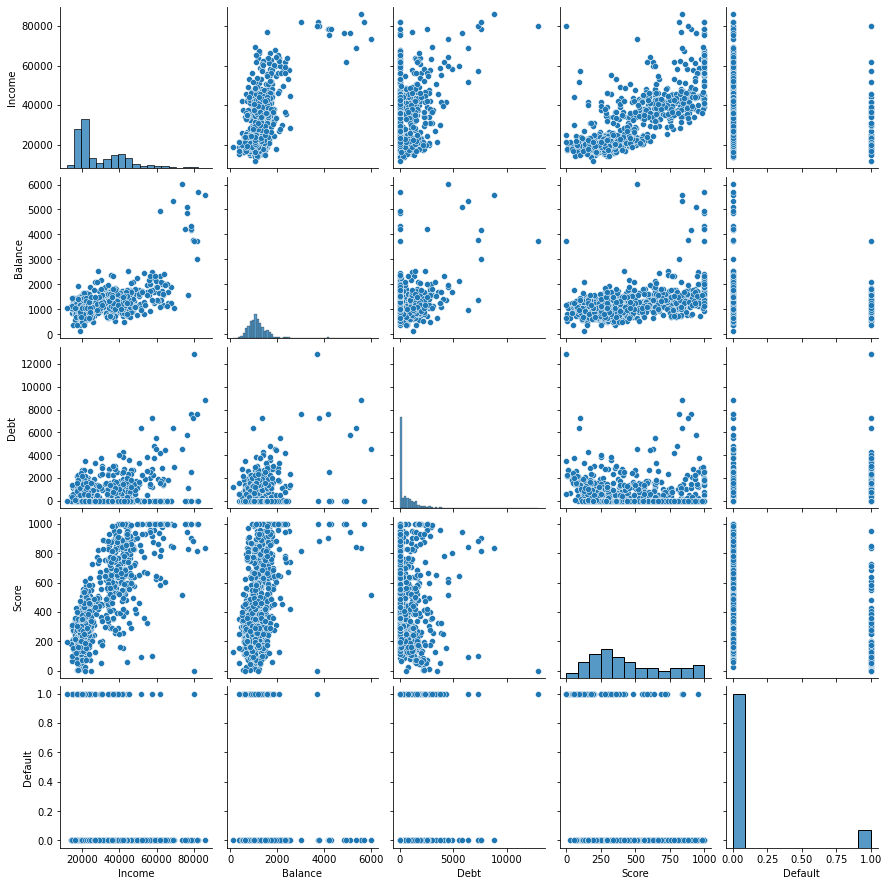

In [12]:
sns.pairplot(df[['Income', 'Term', 'Balance', 'Debt', 'Score', 'Default']])

## Point 1

In [13]:
df.columns

Index(['ID', 'Income', 'Term', 'Balance', 'Debt', 'Score', 'Default'], dtype='object')

In [14]:
df['Default'].value_counts().reset_index(name='counts')

,index,counts
0,False,750
1,True,86


In [15]:
df['Income'].min(), df['Income'].max()

(11800.0, 86000.0)

Range:

- 10,000 - 20,000
- 30,000 - 30,000
- 30,000 - 40,000
- 40,000 - 50,000
- 50,000 - 60,000
- 60,000 - 70,000
- 70,000 +

In [16]:
def salary_range(df):
    if df['Income'] <= 20000:
        df['Income Range'] = '10,000 - 20,000'
    elif df['Income'] > 20000 and df['Income'] <= 30000:
        df['Income Range'] = '20,000 - 30,000'
    elif df['Income'] > 30000 and df['Income'] <= 40000:
        df['Income Range'] = '30,000 - 40,000'
    elif df['Income'] > 40000 and df['Income'] <= 50000:
        df['Income Range'] = '40,000 - 50,000'
    elif df['Income'] > 50000 and df['Income'] <= 60000:
        df['Income Range'] = '50,000 - 60,000'
    else:
        df['Income Range'] = '60000+'
    return df

In [17]:
df = df.apply(salary_range, axis=1)
df.head()

,ID,Income,Term,Balance,Debt,Score,Default,Income Range
0,567,17500.0,Short Term,1460.0,272.0,225.0,False,"10,000 - 20,000"
1,523,18500.0,Long Term,890.0,970.0,187.0,False,"10,000 - 20,000"
2,544,20700.0,Short Term,880.0,884.0,85.0,False,"20,000 - 30,000"
4,756,24300.0,Short Term,1260.0,0.0,495.0,False,"20,000 - 30,000"
5,929,22900.0,Long Term,1540.0,1229.0,383.0,False,"20,000 - 30,000"


In [18]:
df.columns

Index(['ID', 'Income', 'Term', 'Balance', 'Debt', 'Score', 'Default',
       'Income Range'],
      dtype='object')

In [19]:
defaulters = df.groupby(['Income Range', 'Default']).agg({'Default': 'count'})
defaulters

Default
Income Range    Default         
10,000 - 20,000 False        210
                True          26
20,000 - 30,000 False        246
                True          35
30,000 - 40,000 False        110
                True          16
40,000 - 50,000 False        115
                True           5
50,000 - 60,000 False         31
                True           2
60000+          False         38
                True           2

In [20]:
graph1 = df[['Income Range', 'Default']].value_counts().reset_index(name='counts').sort_values('Income Range', ascending=True)
graph1

,Income Range,Default,counts
1,"10,000 - 20,000",False,210
7,"10,000 - 20,000",True,26
0,"20,000 - 30,000",False,246
5,"20,000 - 30,000",True,35
3,"30,000 - 40,000",False,110
8,"30,000 - 40,000",True,16
2,"40,000 - 50,000",False,115
9,"40,000 - 50,000",True,5
6,"50,000 - 60,000",False,31
10,"50,000 - 60,000",True,2


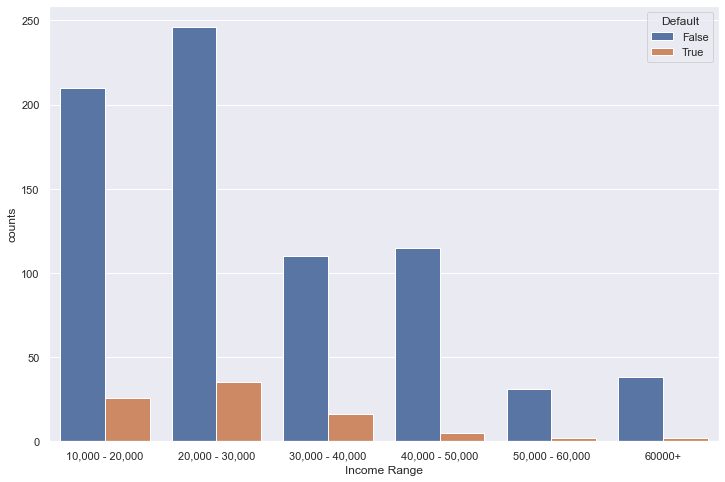

In [21]:
sns.set(rc = {'figure.figsize':(12,8)})
chart1= sns.barplot(x='Income Range', y='counts', hue='Default', data=graph1)

- The people with a higher salary range tend to default less than the people within the smaller salary range.
- The most defaulters lie in the range of 20,000 - 30,000 

## Point 2

In [22]:
df.columns

Index(['ID', 'Income', 'Term', 'Balance', 'Debt', 'Score', 'Default',
       'Income Range'],
      dtype='object')

In [23]:
graph2 = df[['Term', 'Default']].value_counts().reset_index(name='counts')
graph2

,Term,Default,counts
0,Short Term,False,513
1,Long Term,False,237
2,Short Term,True,55
3,Long Term,True,31


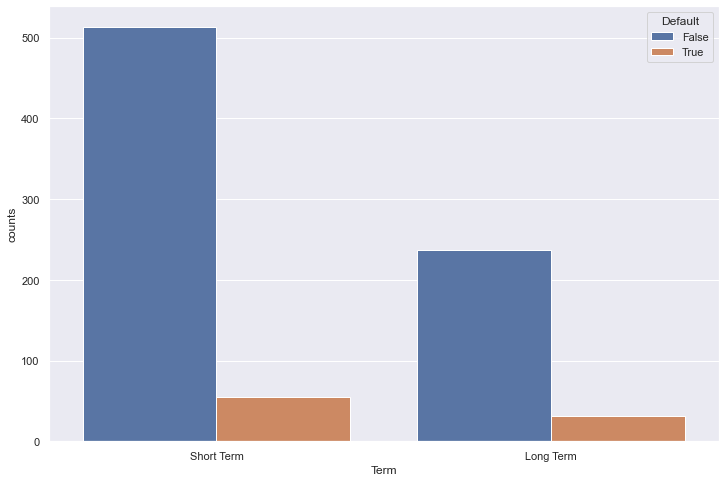

In [24]:
chart2 =  sns.barplot(x='Term', y='counts', hue='Default', data=graph2)

- There are usually more people on short term loans than long term loans
- The ratio of people defaulting on long term is higher than the ratio of people defaulting on short term. 

In [25]:
short_term_ratio = (graph2['counts'].iloc[2] / graph2['counts'].iloc[0])*100
short_term_ratio.round(2)

10.72

In [26]:
long_term_ratio = (graph2['counts'].iloc[3] / graph2['counts'].iloc[1])*100
long_term_ratio.round(2)

13.08

## Point 3

Score vs Debt

In [27]:
sc_vs_db = df[['Debt', 'Score']].sort_values('Score', ascending=True)
sc_vs_db

,Debt,Score
277,547.0,0.0
801,12891.0,0.0
482,3470.0,0.0
176,2130.0,4.0
177,2272.0,5.0
...,...,...
757,1912.0,1000.0
756,0.0,1000.0
542,1499.0,1000.0
732,1771.0,1000.0


<AxesSubplot:xlabel='Score', ylabel='Debt'>

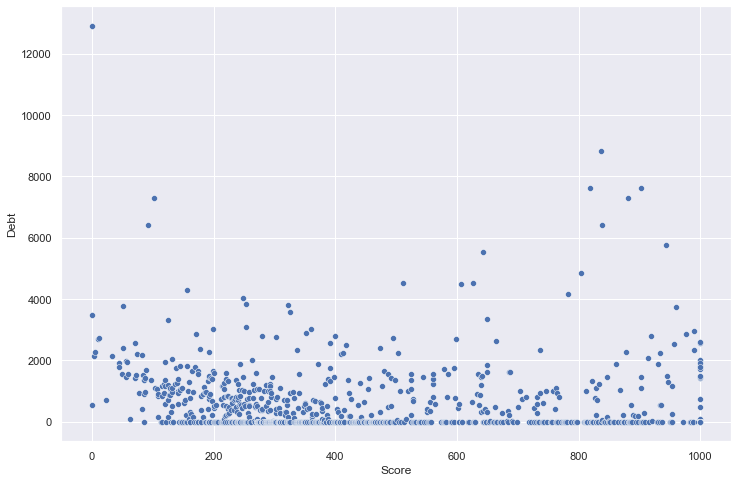

In [28]:
sns.scatterplot(x='Score', y='Debt', data=sc_vs_db)

- There is no strong positive correlation between credit score and debt. However, the people with the highest of debt are the ones with the higher score but generally it is more or less the same across the board

## Point 4

Income vs Credit Score

In [29]:
inc_vs_cs = df[['Income', 'Score']].sort_values('Income')
inc_vs_cs

,Income,Score
803,11800.0,193.0
444,13700.0,179.0
419,13800.0,180.0
372,14300.0,63.0
466,14400.0,309.0
...,...,...
801,79900.0,0.0
791,81800.0,1000.0
800,81900.0,818.0
798,82100.0,1000.0


<AxesSubplot:xlabel='Income', ylabel='Score'>

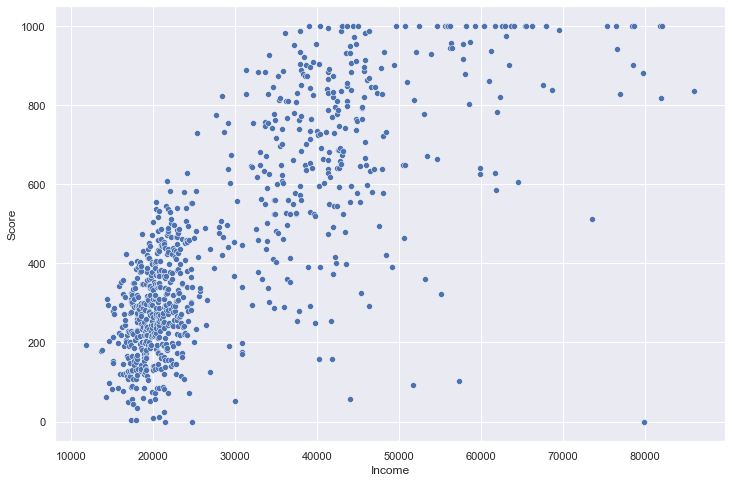

In [30]:
sns.scatterplot(x='Income', y='Score', data=inc_vs_cs)

- As the income increases, the credit score increases. The people who have a higher credit score default less.

Credit score vs Default

In [31]:
df[['Score', 'Default']]

,Score,Default
0,225.0,False
1,187.0,False
2,85.0,False
4,495.0,False
5,383.0,False
...,...,...
851,52.0,True
852,779.0,False
853,360.0,True
854,417.0,False


In [32]:
df['Score'].min(), df['Score'].max()

(0.0, 1000.0)

In [33]:
def score_range(df):
    if df['Score'] <= 200:
        df['Score Range'] = '0-200'
    elif df['Score'] > 200 and df['Score'] <= 400:
        df['Score Range'] = '200 - 400'
    elif df['Score'] > 400 and df['Score'] <= 600:
        df['Score Range'] = '400 - 600'
    elif df['Score'] > 600 and df['Score'] <= 800:
        df['Score Range'] = '600 - 800'
    else:
        df['Score Range'] = '800-1000'
    return df

In [34]:
df = df.apply(score_range, axis=1)
df

,ID,Income,Term,Balance,Debt,Score,Default,Income Range,Score Range
0,567,17500.0,Short Term,1460.0,272.0,225.0,False,"10,000 - 20,000",200 - 400
1,523,18500.0,Long Term,890.0,970.0,187.0,False,"10,000 - 20,000",0-200
2,544,20700.0,Short Term,880.0,884.0,85.0,False,"20,000 - 30,000",0-200
4,756,24300.0,Short Term,1260.0,0.0,495.0,False,"20,000 - 30,000",400 - 600
5,929,22900.0,Long Term,1540.0,1229.0,383.0,False,"20,000 - 30,000",200 - 400
...,...,...,...,...,...,...,...,...,...
851,71,30000.0,Long Term,1270.0,3779.0,52.0,True,"20,000 - 30,000",0-200
852,932,42500.0,Long Term,1550.0,0.0,779.0,False,"40,000 - 50,000",600 - 800
853,39,36400.0,Long Term,1830.0,3032.0,360.0,True,"30,000 - 40,000",200 - 400
854,283,42200.0,Long Term,1500.0,2498.0,417.0,False,"40,000 - 50,000",400 - 600


In [35]:
graph3 = df[['Score Range', 'Default']].value_counts().reset_index(name='counts').sort_values('Score Range', ascending=True)
graph3

,Score Range,Default,counts
4,0-200,False,94
5,0-200,True,50
0,200 - 400,False,281
6,200 - 400,True,22
1,400 - 600,False,145
7,400 - 600,True,6
3,600 - 800,False,98
8,600 - 800,True,5
2,800-1000,False,132
9,800-1000,True,3


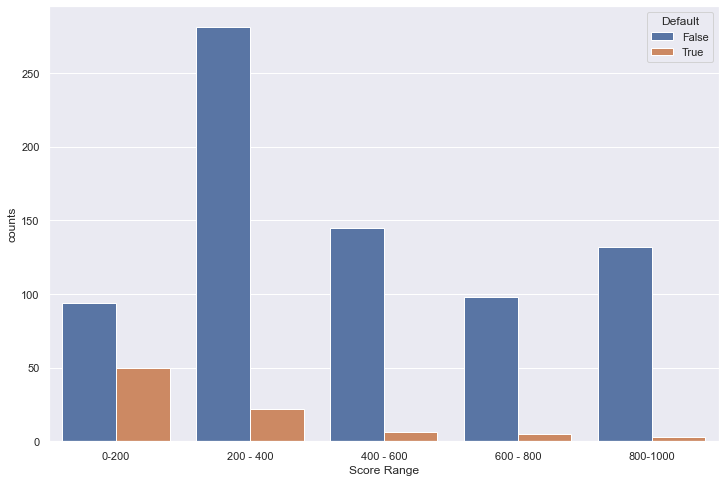

In [36]:
chart3 = sns.barplot(x='Score Range', y='counts', hue='Default', data=graph3)

- As we said, the people with the higher credit score tend to default less as the people with the lower credit score.